In [98]:
import json 
import numpy as np


with open('/home/amshali/Code/ml/dataset/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset.json') as f:
  datastore = json.load(f)


vocab_size = 4000
embedding_dim = 10
max_length = 20
trunc_type = 'post'
padding_type = 'post'
oov_token = '<OOV>'
training_size = 20000
num_epochs = 30


sentences = []
labels = []
urls = []

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])
  urls.append(item['article_link'])


training_sentences = sentences[0:training_size]
training_labels = np.array(labels[0:training_size])
testing_sentences = sentences[training_size:]
testing_labels = np.array(labels[training_size:])


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(training_sentences)

# print(tokenizer.word_index)

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, 
                                maxlen=max_length, padding=padding_type,
                                truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, 
                                maxlen=max_length, padding=padding_type,
                                truncating=trunc_type)



In [99]:

model = tf.keras.Sequential([
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dense(24, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_20 (Embedding)     (None, 20, 10)            40000     
_________________________________________________________________
global_average_pooling1d_19  (None, 10)                0         
_________________________________________________________________
dense_40 (Dense)             (None, 16)                176       
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 17        
Total params: 40,193
Trainable params: 40,193
Non-trainable params: 0
_________________________________________________________________


In [100]:

fit_history = model.fit(training_padded, training_labels, 
                        epochs=num_epochs,
                        validation_data=(testing_padded, testing_labels), verbose=2)


Train on 20000 samples, validate on 6709 samples
Epoch 1/30
20000/20000 - 1s - loss: 0.5853 - accuracy: 0.6877 - val_loss: 0.4268 - val_accuracy: 0.8210
Epoch 2/30
20000/20000 - 1s - loss: 0.3506 - accuracy: 0.8549 - val_loss: 0.3658 - val_accuracy: 0.8380
Epoch 3/30
20000/20000 - 1s - loss: 0.2890 - accuracy: 0.8801 - val_loss: 0.3554 - val_accuracy: 0.8430
Epoch 4/30
20000/20000 - 1s - loss: 0.2596 - accuracy: 0.8920 - val_loss: 0.3624 - val_accuracy: 0.8407
Epoch 5/30
20000/20000 - 1s - loss: 0.2415 - accuracy: 0.9011 - val_loss: 0.3789 - val_accuracy: 0.8365
Epoch 6/30
20000/20000 - 1s - loss: 0.2295 - accuracy: 0.9051 - val_loss: 0.3883 - val_accuracy: 0.8354
Epoch 7/30
20000/20000 - 1s - loss: 0.2197 - accuracy: 0.9109 - val_loss: 0.4049 - val_accuracy: 0.8331
Epoch 8/30
20000/20000 - 1s - loss: 0.2128 - accuracy: 0.9136 - val_loss: 0.4160 - val_accuracy: 0.8341
Epoch 9/30
20000/20000 - 1s - loss: 0.2076 - accuracy: 0.9170 - val_loss: 0.4305 - val_accuracy: 0.8320
Epoch 10/30
200

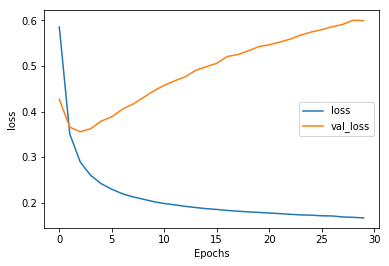

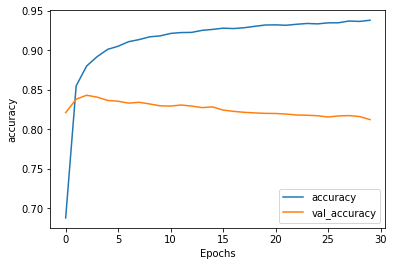

In [101]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_' + string])
  plt.show()
  
plot_graphs(fit_history, "loss")
plot_graphs(fit_history, "accuracy")


